In [2]:
import pandas as pd
import numpy as np
import random

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
def substrings_in_string(full_string, substrings):
    for substring in substrings:
        if full_string.find(substring) != -1:
            return substring
    return ""

In [4]:
# Load Training Data
df_train = pd.read_csv('data/train.csv', index_col = 'PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>


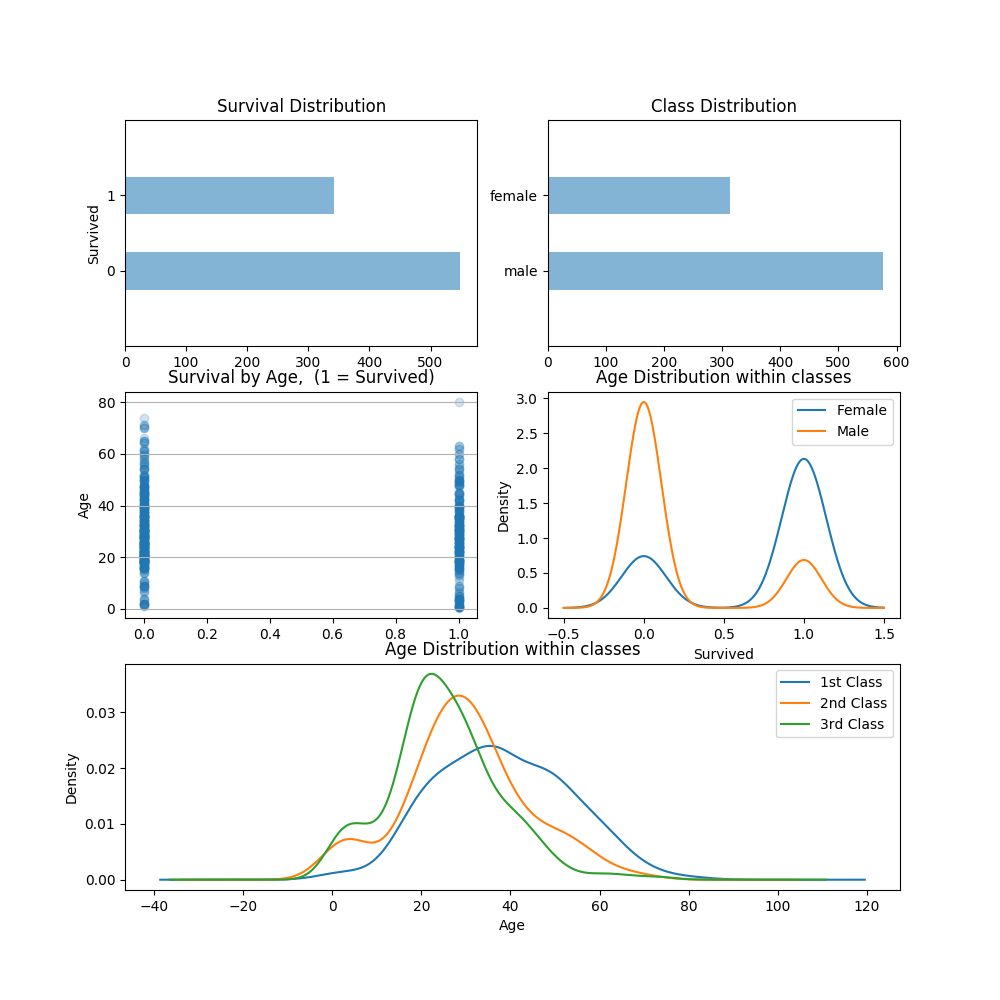

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(10, 10)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55


ax1 = plt.subplot2grid((3,2),(0,0))
df_train.Survived.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax1.set_ylim(-1, len(df_train.Survived.value_counts()))
plt.ylabel("Survived")
plt.title("Survival Distribution")

ax3 = plt.subplot2grid((3,2),(0,1))
df_train.Sex.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df_train.Sex.value_counts()))
plt.title("Class Distribution")


plt.subplot2grid((3,2),(1,0))
plt.scatter(df_train.Survived, df_train.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

#plt.subplot2grid((3,2),(0,1))
#plt.scatter(df_all.Survived, df_all.Sex, alpha=alpha_scatterplot)
# sets the y axis label
#plt.ylabel("Age")
# formats the grid line style of our graphs                          
#plt.grid(b=True, which='major', axis='y')  
#plt.title("Survival by Age,  (1 = Survived)")



plt.subplot2grid((3,2),(1,1),)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df_train.Survived[df_train.Sex == 'female'].plot(kind='kde')    
df_train.Survived[df_train.Sex == 'male'].plot(kind='kde')
# plots an axis label
plt.xlabel("Survived")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('Female', 'Male'), loc='best') 



plt.subplot2grid((3,2),(2,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
# plots an axis label
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best') 

In [6]:
# Select Numeric Featues
df_numeric = df_all[['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']]
df_numeric.head()

,Age,Fare,Parch,Pclass,SibSp
PassengerId,,,,,
1,22.0,7.2500,0,3,1
2,38.0,71.2833,0,1,1
3,26.0,7.9250,0,3,0
4,35.0,53.1000,0,1,1
5,35.0,8.0500,0,3,0


In [7]:
# Select Categorical Features
df_category = df_all[['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']]
df_category.head()

,Cabin,Embarked,Name,Sex,Ticket
PassengerId,,,,,
1,NaN,S,"Braund, Mr. Owen Harris",male,A/5 21171
2,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
3,NaN,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
4,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
5,NaN,S,"Allen, Mr. William Henry",male,373450


In [8]:
# Numeric Feature Engineering

# Create a Family Size Column
df_numeric['FamilySize']= df_numeric['SibSp'] + df_numeric['Parch']

# Create a Fare/Person Column
df_numeric['FarePerPerson'] = df_numeric['Fare'] / (df_numeric['FamilySize'] +1)

df_numeric.head()

,Age,Fare,Parch,Pclass,SibSp,FamilySize,FarePerPerson
PassengerId,,,,,,,
1,22.0,7.2500,0,3,1,1,3.62500
2,38.0,71.2833,0,1,1,1,35.64165
3,26.0,7.9250,0,3,0,0,7.92500
4,35.0,53.1000,0,1,1,1,26.55000
5,35.0,8.0500,0,3,0,0,8.05000


In [9]:
# Category Feature Engineering

# Create a Deck Column
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df_category['Cabin'] = df_category['Cabin'].astype(str)
df_category['Deck'] = df_category['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

df_category.head()

,Cabin,Embarked,Name,Sex,Ticket,Deck
PassengerId,,,,,,
1,nan,S,"Braund, Mr. Owen Harris",male,A/5 21171,
2,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,nan,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,
4,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C
5,nan,S,"Allen, Mr. William Henry",male,373450,


In [10]:
# Impute Missing Numeric Values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
numeric_data = imp.fit_transform(df_numeric)

# Normalize Numeric Features
numeric_column_names = df_numeric.columns
from sklearn.preprocessing import Normalizer
norm = Normalizer(copy=False)
numeric_data = norm.fit_transform(numeric_data)

df_numeric = pd.DataFrame(columns=numeric_column_names, data=numeric_data, index=df_numeric.index)

print('({0[0]},{0[1]})'.format(df_numeric.shape))
df_numeric.head()

(1309,7)


,Age,Fare,Parch,Pclass,SibSp,FamilySize,FarePerPerson
PassengerId,,,,,,,
1,0.929087,0.306176,0.0,0.126694,0.042231,0.042231,0.153088
2,0.430303,0.807195,0.0,0.011324,0.011324,0.011324,0.403598
3,0.913202,0.278351,0.0,0.105370,0.000000,0.000000,0.278351
4,0.507699,0.770252,0.0,0.014506,0.014506,0.014506,0.385126
5,0.947815,0.217998,0.0,0.081241,0.000000,0.000000,0.217998


In [11]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for column in df_category:
    dt = df_category[column].dtype
    colum_index = df_category.columns.get_loc(df_category[column].name)
    
    # Clean-up NaN's in the Categorical data
    if df_category[column].dtype == int or df_category[column].dtype == float:
        df_category[column].fillna(0, inplace=True)
    else:
        df_category[column].fillna("", inplace=True)

    df_category[column] = label_enc.fit_transform(df_category[column])

print('({0[0]},{0[1]})'.format(df_category.shape))
df_category.head()

(1309,6)


,Cabin,Embarked,Name,Sex,Ticket,Deck
PassengerId,,,,,,
1,186,3,155,1,720,0
2,106,1,286,0,816,3
3,186,3,523,0,914,0
4,70,3,422,0,65,3
5,186,3,22,1,649,0


In [12]:
# Merge Numeric and Category Feaures
df_clean = pd.concat([df_category, df_numeric], axis=1)

print('({0[0]},{0[1]})'.format(df_clean.shape))
df_clean.head()

(1309,13)


,Cabin,Embarked,Name,Sex,Ticket,Deck,Age,Fare,Parch,Pclass,SibSp,FamilySize,FarePerPerson
PassengerId,,,,,,,,,,,,,
1,186,3,155,1,720,0,0.929087,0.306176,0.0,0.126694,0.042231,0.042231,0.153088
2,106,1,286,0,816,3,0.430303,0.807195,0.0,0.011324,0.011324,0.011324,0.403598
3,186,3,523,0,914,0,0.913202,0.278351,0.0,0.105370,0.000000,0.000000,0.278351
4,70,3,422,0,65,3,0.507699,0.770252,0.0,0.014506,0.014506,0.014506,0.385126
5,186,3,22,1,649,0,0.947815,0.217998,0.0,0.081241,0.000000,0.000000,0.217998


In [13]:
# Split back into Train and Test Datasets
df_clean_train = df_clean[:891]
df_clean_test = df_clean[891:]


# Add "Survived" Column back to the Train dataset
df_clean_train = pd.concat([df_clean_train, df_train['Survived']], axis=1)

print('Test data({0[0]},{0[1]})'.format(df_clean_test.shape))
print('Train data({0[0]},{0[1]})'.format(df_clean_train.shape))
df_clean_train.tail()

Test data(418,13)
Train data(891,14)


,Cabin,Embarked,Name,Sex,Ticket,Deck,Age,Fare,Parch,Pclass,SibSp,FamilySize,FarePerPerson,Survived
PassengerId,,,,,,,,,,,,,,
887,186,3,811,1,130,0,0.825029,0.397236,0.000000,0.061113,0.000000,0.000000,0.397236,0
888,40,3,464,0,18,2,0.408626,0.645199,0.000000,0.021507,0.000000,0.000000,0.645199,1
889,186,3,607,0,923,0,0.771488,0.605445,0.051637,0.077456,0.025819,0.077456,0.151361,0
890,77,1,113,1,11,3,0.522409,0.602779,0.000000,0.020093,0.000000,0.000000,0.602779,1
891,186,2,338,1,642,0,0.942349,0.228225,0.000000,0.088345,0.000000,0.000000,0.228225,0


In [14]:
# Split the Train DataSet into X and y
X = df_clean_train.drop('Survived', axis=1)
y = df_clean_train.Survived

# Shuffle and Split the data
# This is running a StratifiedShuffleSplit in sklearn
import sklearn.model_selection as skms
X_train, X_validation, y_train, y_validation = skms.train_test_split(X, y,
                                                                     test_size=0.2, train_size=0.8,
                                                                     random_state=42, stratify=y)

In [16]:
# Train XGBoost Model
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

/Users/rbales/.virtualenvs/k/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [106]:
# Predict on the Cross Validation Set
y_val_pred = model.predict(X_validation)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_val_pred))

# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_validation, y_val_pred))

             precision    recall  f1-score   support

          0       0.80      0.85      0.83       110
          1       0.74      0.67      0.70        69

avg / total       0.78      0.78      0.78       179

0.782122905028


In [107]:
# Predict on the Test Dataset
X_test = df_clean_test
y_test = model.predict(X_test)

In [108]:
# Build the Submission Dataset
predictions = pd.DataFrame()
predictions['PassengerId'] = X_test.index
predictions['Survived'] = y_test.tolist()

print('Predictions({0[0]},{0[1]})'.format(predictions.shape))
print(predictions.head())

Predictions(418,2)
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [109]:
# Save Output
predictions.to_csv('data/submission.csv', index=False)